In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/air500/TAUX/CESM_TAU_1200_.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/group/ihesp/user/xiliangdiao/ihespdata/air500/TAUX/CESM_TAU_1200_.nc'

In [ ]:
data

In [ ]:
LAT = data.variables['lat']
LON = data.variables['lon']
PLOT = data.variables['TAUX']

In [ ]:
PLOT.shape

In [ ]:
LAT[160]

In [3]:
LON[:160]

NameError: name 'LON' is not defined

In [4]:
plt.plot(PLOT[0,60:200,0])

NameError: name 'PLOT' is not defined

In [16]:
np.where(PLOT[0,:200,0]>0)[-1][-1]

103

In [17]:
np.where(PLOT == np.max(PLOT[0,:,:]))

(array([0]), array([448]), array([483]))

In [18]:
LAT[np.where(PLOT == np.max(PLOT[0,:,:]))[1]]

masked_array(data=[22.],
             mask=False,
       fill_value=1e+20)

In [2]:
#####new340-500.out

years = [f"{x:04d}" for x in range(0,1955)]
ii =0
result = np.zeros(1955)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT2 = np.mean(TAUX,axis=1)
    #result[ii] = TAUX[TAUX[:,:] == np.nanmin(TAUX[:,:])]
    result[ii] = TT2[TT2[:] == np.nanmin(TT2[:])]
    ii = ii + 1
    #lont1 = data1.variables['lon'][-220:]
    #lont2 = data1.variables['lon'][:160]
    #lont = np.hstack((lont1,lont2))
    #latt = data1.variables['lat'][80:160]

In [3]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

([<matplotlib.axis.XTick at 0x7f4fcc264828>,
 <a list of 9 Text xticklabel objects>)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


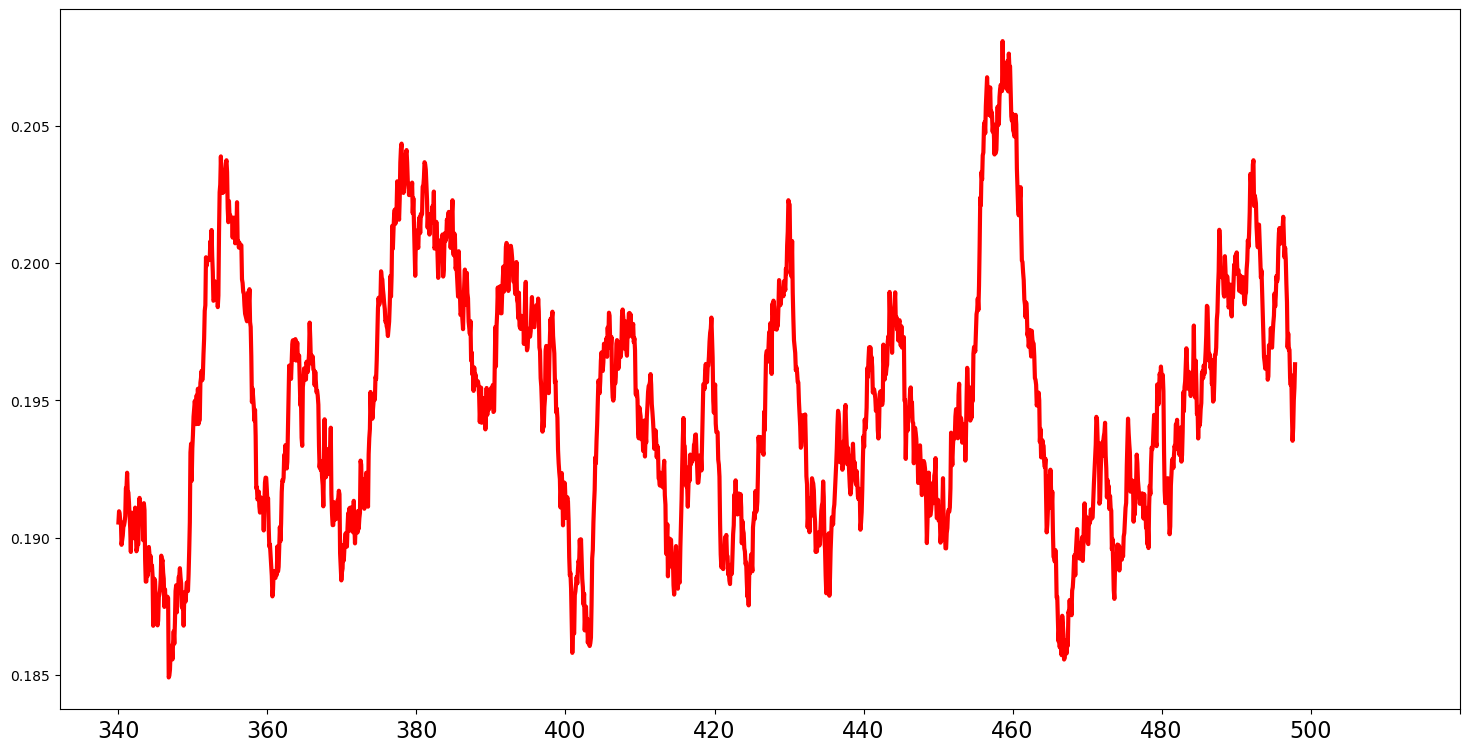

In [4]:
#t=np.arange(30,2131,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'red',linewidth=3)
plt.xticks(range(0,2161,240), ['340', '360', '380', '400','420','440','460','480','500'],**my_font)

In [5]:
# 20-330
years = [f"{x:04d}" for x in range(0,3719)]
ii =0
result2 = np.zeros(3719)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT3 = np.mean(TAUX,axis=1)
    #result2[ii] = TAUX[TAUX[:,:] == np.nanmin(TAUX[:,:])]
    result2[ii] = TT3[TT3[:] == np.nanmin(TT3[:])]
    ii = ii + 1

In [6]:
ww222 = np.convolve(result2, np.ones((60,))/60, mode='valid')

In [7]:
ww222.shape

(3660,)

([<matplotlib.axis.XTick at 0x7f4fcc1ee4a8>,
 <a list of 10 Text xticklabel objects>)

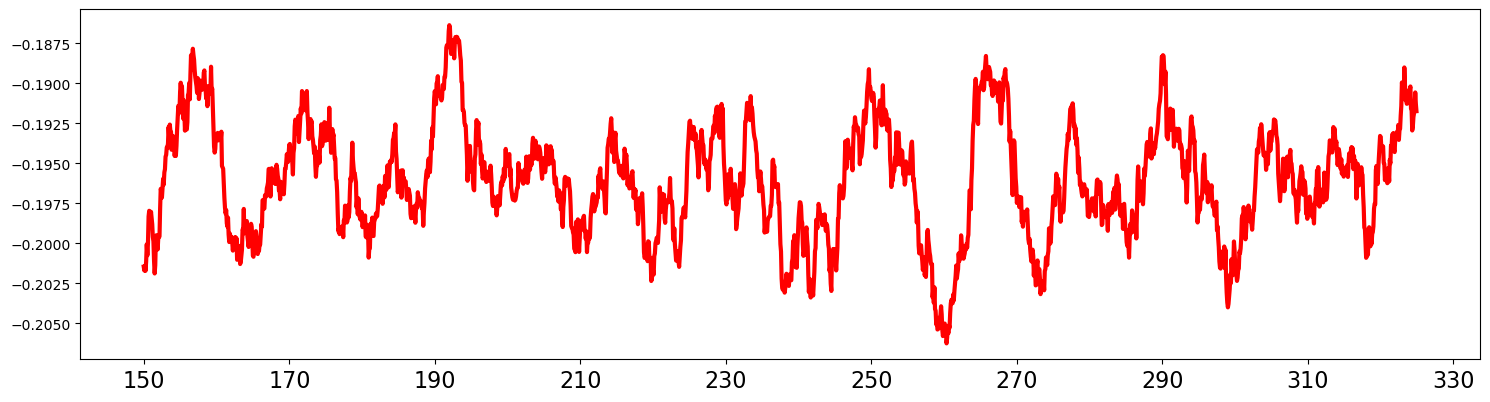

In [8]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww222[1560:],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#########################################
plt.xticks(range(0,2161,240), ['150', '170', '190', '210','230','250','270','290','310','330'],**my_font)

In [9]:
130*12

1560

In [10]:
years = [f"{x:04d}" for x in range(0,96)]
ii =0
result5 = np.zeros(96)
# here PSL is TAUX !!!!!!!
for yy in years:
    data1=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/TAUX/CESM_PSL_'+yy+'_.nc')
    TAUX1 = data1.variables['PSL'][0,80:280,-200:]
    TAUX2 = data1.variables['PSL'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT5 = np.mean(TAUX,axis=1)
    result5[ii] = TT5[TT5[:] == np.nanmin(TT5[:])]
    #result5[ii] = TAUX[TAUX[:,:] == np.nanmin(TAUX[:,:])]
    ii = ii + 1

In [11]:
hh = np.hstack((result2,result5))
hh2 = np.hstack((hh,result))

In [12]:
ww222 = np.convolve(hh2, np.ones((60,))/60, mode='valid')

In [13]:
ww222[1560:].shape

(4151,)

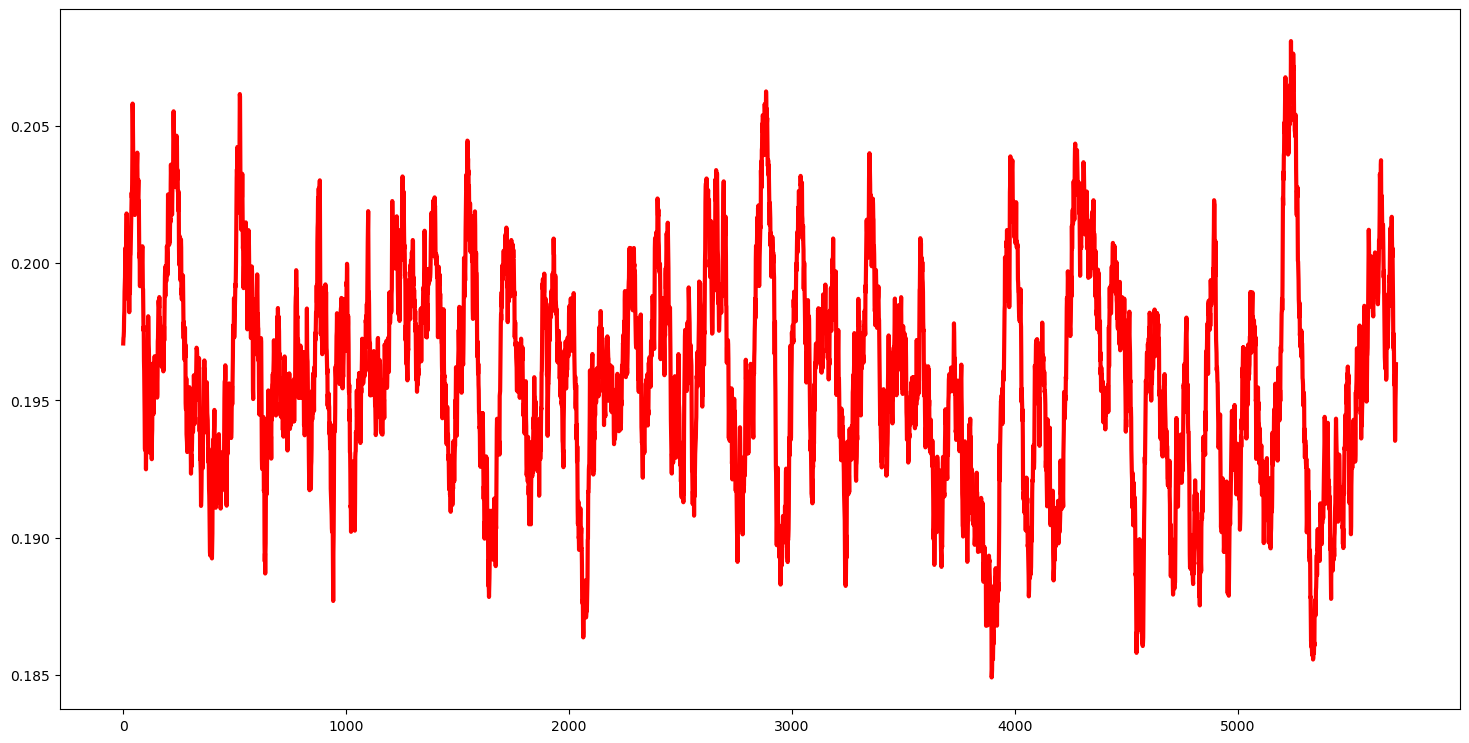

In [14]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww222,'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#########################################
#plt.xticks(range(0,4151,240), ['150', '170', '190', '210','230','250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','410','430','450','470','490','500'],**my_font)
plt.savefig("values480.png",bbox_inches='tight',dpi=fig.dpi)

In [29]:
alld = hh2[:5760]
d4 = alld.reshape(480,12)
d5 = np.nanmean(d4,axis=1)
w2 = np.convolve(d5, np.ones((5,))/5, mode='valid')

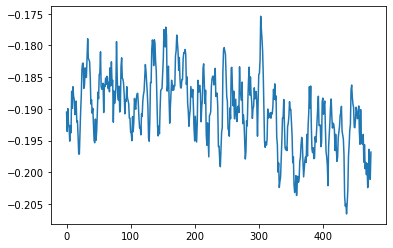

In [37]:
plt.plot(w2)

In [32]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

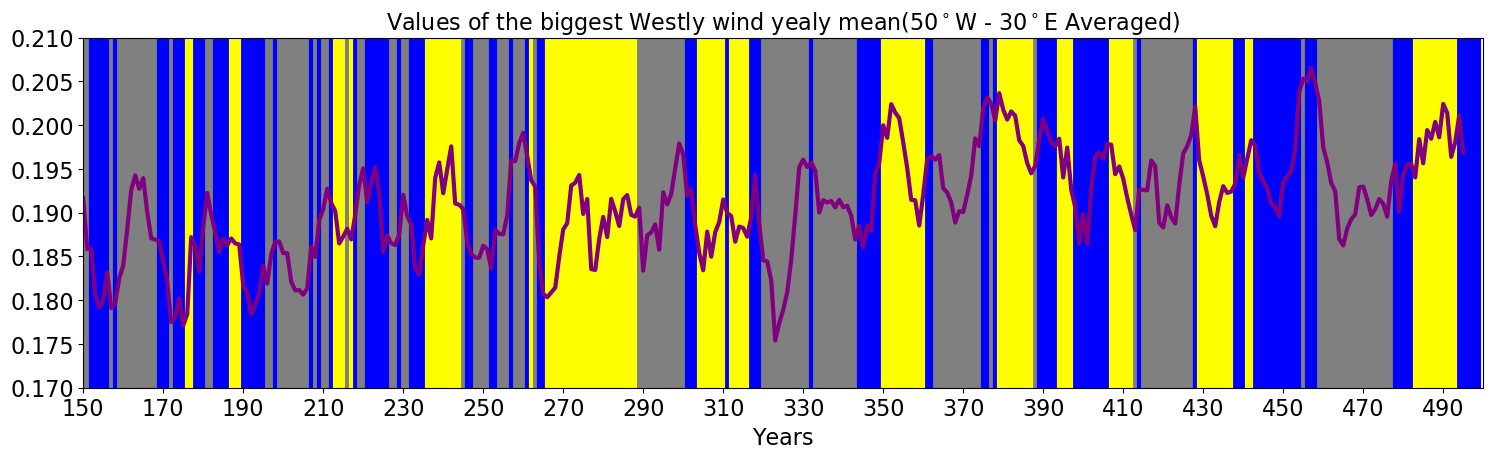

In [39]:
t = np.arange(2,348,1)
#t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(-w2[130:],'purple',linewidth=3)
#plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 0.17, 0.21, colors = "grey",linewidth=3)
plt.vlines(mrpxx,  0.17, 0.21, colors = "blue",linewidth=3)
plt.vlines(wspxx,  0.17, 0.21, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.title('Values of the biggest Westly wind yealy mean(50$^\circ$W - 30$^\circ$E Averaged)',color= 'black',**my_font)
plt.axis("tight")
ax0.set(ylim=(0.17, 0.21),xlim=(0, 350))
plt.savefig("pos.png",bbox_inches='tight',dpi=fig.dpi)

In [21]:
ww222 = np.convolve(hh2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww222)

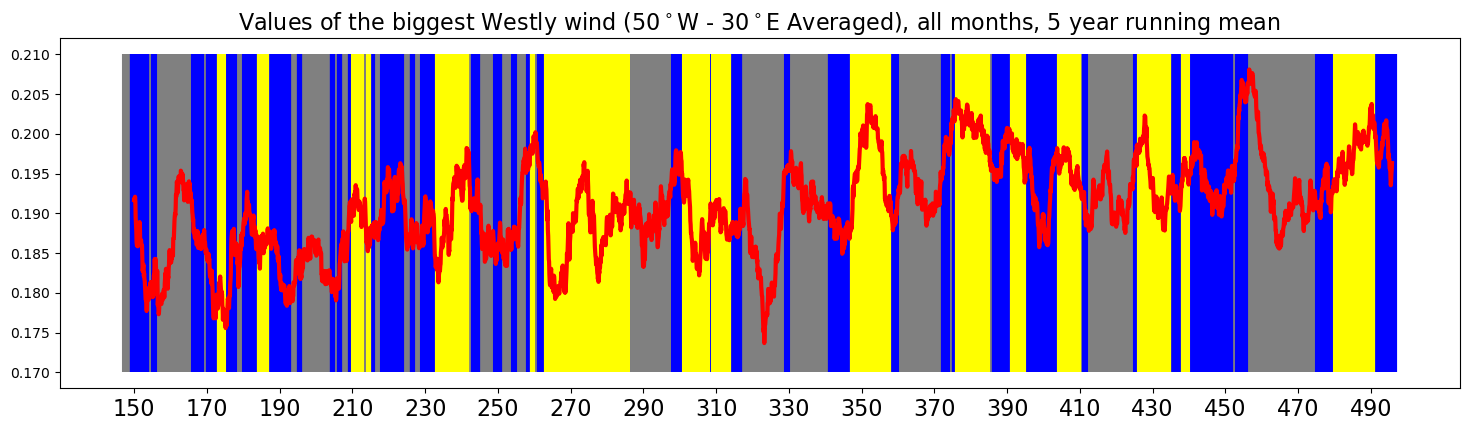

In [26]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww222[1560:],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
#########################################
plt.vlines(noxxx, 0.17, 0.21, colors = "grey")
plt.vlines(mrpxxx,  0.17, 0.21, colors = "blue")
plt.vlines(xxx,  0.17, 0.21, colors = "yellow")
plt.xticks(range(0,4200,240), ['150', '170', '190', '210','230','250','270','290','310','330','350', '370', '390', '410','430','450','470','490','500'],**my_font)
#ax0.set(ylim=(-49, -52.5),xlim=(0, 4170))

ax0.set_title('Values of the biggest Westly wind (50$^\circ$W - 30$^\circ$E Averaged), all months, 5 year running mean',**my_font)
plt.savefig("valuemax.png",bbox_inches='tight',dpi=fig.dpi)

In [23]:
ww222[1560:].shape

(4151,)

In [24]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]

xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]

mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36